## Lending Club Loan Data Analysis:


### Introduction:

The company assigns loan grades (A-G) to each loan. The company wants to understand the driving factors behind loan default, i.e. the variables which are strong indicators of default. The company can utilize this knowledge for its portfolio and risk assessment.In this case study, we will use Exploratory Data Analysis(EDA) to understand how consumer attributes and loan attributes influence the tendency of default.

### Objectives:

1. How is loan volume changing over time? Is there any seasonality to their loan origination? 
2. This company assigns loan grades (A-G) to each loan. Is their grading system indicative of performance? 
3. Outside of loan grade, what else would you say are borrower characteristics that affect loan performance?


###  Data Understanding:

The data file contains loan data for all loans issued through the 2016-2018, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment informations. 

Additional features include credit scores, employment title, length, state etc. are also provided along with loan grades (A-G) which was assigned by the Lending club to each loan. 

The file is a matrix of about 1373228 observations and 56 variables. A data dictionary is provided in separate file.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Data
df = pd.read_csv("C:\\Users\\Ipsita\\OneDrive\\Desktop\\approved_data_2016_2018.csv", low_memory=False) #Dataset

### Data Cleaning

In [3]:
loan=df
loan.head(5)
loan.columns

## summarising number of missing values in each column
loan.isnull().sum()

# percentage of missing values in each column
round(loan.isnull().sum()/len(loan.index), 2)*100

Unnamed: 0                     0.0
id                             0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      8.0
emp_length                     7.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                         100.0
purpose                        0.0
title                          2.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
fico_range_low                 0.0
fico_range_high     

We can see that many columns have missing values. First, let's drop the columns having 90% missing values or more.

In [4]:
# removing the columns having more than 90% missing values
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 50]
print(missing_columns)

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object')


In [ ]:
loan = loan.drop(missing_columns, axis=1)
print(loan.shape)

The data looks clean by and large. Let's also check whether all columns are in the correct format.

In [ ]:
loan.info()

In [6]:
# also, lets extract the numeric part from the variable employment length

# first, let's drop the missing values from the column (otherwise the regex code below throws error)
loan = loan[~loan['emp_length'].isnull()]

# using regular expression to extract numeric values from the string
import re
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))

### Exploratory Data Analysis(EDA);

In [7]:

# let's also observe the distribution of loans across years
# first lets convert the year column into datetime and then extract year and month from it
loan['issue_d'].head()

loan['issue date'] = pd.to_datetime(loan['issue_d'])

# extracting month and year from issue_date
loan['year']= loan['issue date'].dt.year
loan['month']= loan['issue date'].dt.month

# let's first observe the number of loans issued across years
yearly_loan_volume=loan.groupby('year').year.count()
yearly_loan_volume

year
2016    406193
2017    411708
2018    453255
Name: year, dtype: int64

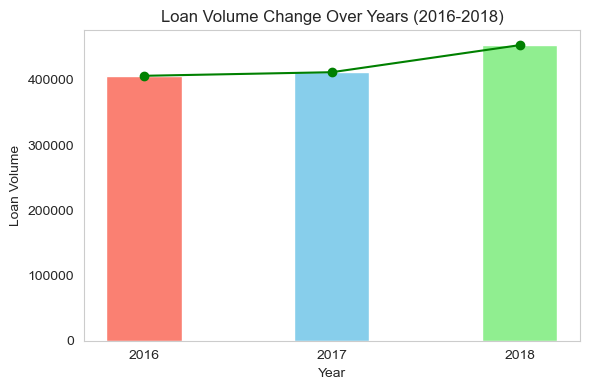

In [8]:
yearly_loan_volume = loan.groupby(loan['issue date'].dt.year)['loan_amnt'].count()
# Reset index to make 'year' as a column
yearly_loan_volume = yearly_loan_volume.reset_index()
# Plot the loan volume change over time
plt.figure(figsize=(6, 4))
colors = ['salmon','skyblue','lightgreen']
# Bar plot
plt.bar(yearly_loan_volume['issue date'], yearly_loan_volume['loan_amnt'], width=0.4,color=colors, label='Loan Volume')

plt.plot(yearly_loan_volume['issue date'], yearly_loan_volume['loan_amnt'], marker='o', color='green',linestyle='-')
plt.title('Loan Volume Change Over Years (2016-2018)')
plt.xlabel('Year')
plt.ylabel('Loan Volume')
plt.xticks(yearly_loan_volume['issue date'])  # Set x-ticks to years
plt.grid(False)
plt.tight_layout()
plt.show()

We can see that the number of loans has increased steadily across years.

In [9]:
# number of loans across months
loan.groupby('month').month.count()

month
1      93568
2      92386
3     127412
4     100872
5     104289
6     105280
7     109491
8     116924
9      98631
10    108171
11    109257
12    104875
Name: month, dtype: int64

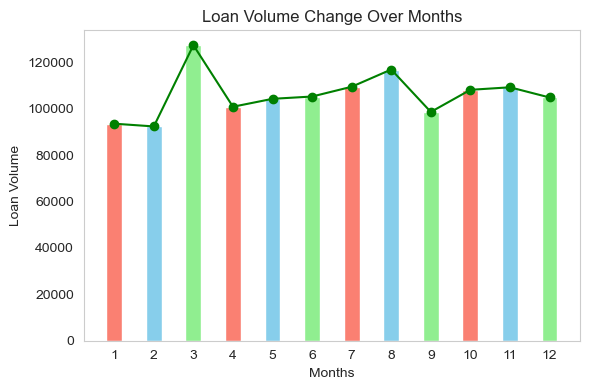

In [10]:
monthly_loan_volume = loan.groupby(loan['issue date'].dt.month)['loan_amnt'].count()
# Reset index to make 'year' as a column
monthly_loan_volume = monthly_loan_volume.reset_index()
# Plot the loan volume change over time
plt.figure(figsize=(6, 4))
colors = ['salmon','skyblue','lightgreen']
# Bar plot
plt.bar(monthly_loan_volume['issue date'],monthly_loan_volume['loan_amnt'], width=0.4,color=colors, label='Loan Volume')

plt.plot(monthly_loan_volume['issue date'], monthly_loan_volume['loan_amnt'], marker='o', color='green',linestyle='-')
plt.title('Loan Volume Change Over Months')
plt.xlabel('Months')
plt.ylabel('Loan Volume')
plt.xticks(monthly_loan_volume['issue date'])  # Set x-ticks to years
plt.grid(False)
plt.tight_layout()
plt.show()

Not as such significant pattern observed.

#### Objective 2
Next, let's have a look at the target variable - loan_status. We need to relabel the values to a binary form - 0 or 1, 1 indicating that the person has defaulted and 0 otherwise.

In [11]:
#loan['loan_status'] =loan['loan_status'].astype('category')
loan['loan_status'].value_counts()

loan_status
Current               759735
Fully Paid            377575
Charged Off           105197
Late (31-120 days)     17992
In Grace Period         7063
Late (16-30 days)       3561
Default                   33
Name: count, dtype: int64

grade
C    43686
D    27894
B    26043
E    14154
A     6765
F     5882
G     2359
Name: count, dtype: int64
grade
A    0.025560
B    0.068786
C    0.116688
D    0.164081
E    0.236602
F    0.337445
G    0.378287
Name: count, dtype: float64


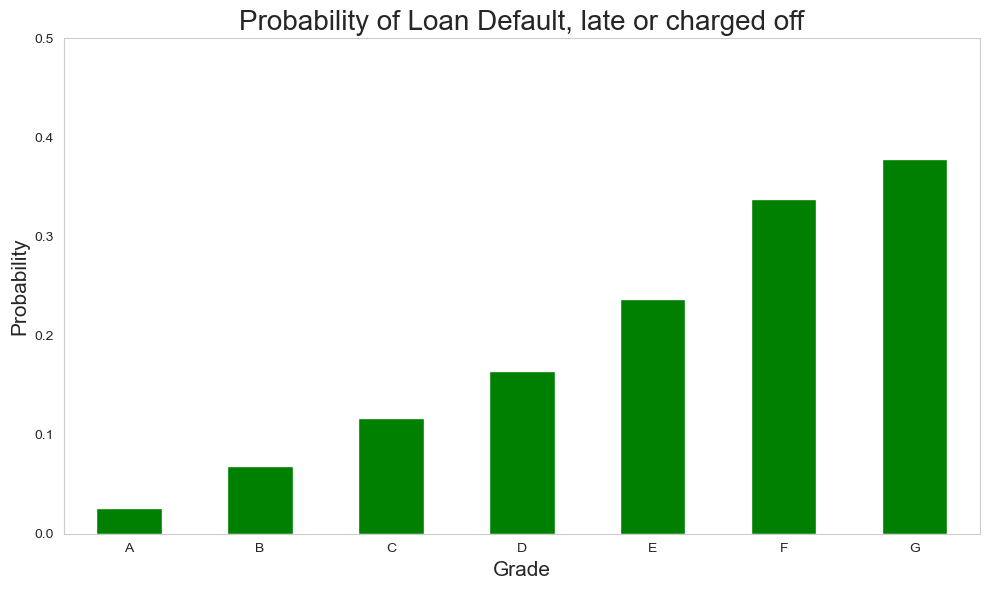

In [12]:
# Step 2: Group by loan_status and grade and calculate counts
sns.set_style("whitegrid")

loan_statuses = ['Default', 'Late (31-120 days)', 'Late (16-30 days)','Charged Off','In Grace Period']

# Step 2: Filter the DataFrame for 'Default' loan statuses
default_loan = loan[loan['loan_status'].isin(loan_statuses)]

# Step 3: Calculate the count of 'Default' loan statuses for each grade
default_counts = default_loan['grade'].value_counts()
print(default_counts)

# Step 4: Calculate the probability of loan default for each grade
total_loans_per_grade = loan['grade'].value_counts()
default_probabilities = default_counts / total_loans_per_grade

print(default_probabilities)

# Step 5: Plot the probabilities in a bar plot
plt.figure(figsize=(10, 6))
default_probabilities.sort_index().plot(kind='bar', color='green')
plt.title('Probability of Loan Default, late or charged off',size=20)
plt.xlabel('Grade',size=15)
plt.ylabel('Probability',size=15)
plt.ylim(0, 0.5)  # Limit y-axis to 0.5 for better visualization
plt.xticks(rotation=0)
plt.grid(False)
plt.tight_layout()
plt.show()

Clearly, as the grade of loan goes from A to G, the default rate increases. This is expected because the grade is decided by Lending Club based on the riskiness of the loan.

term
 36 months    82153
 60 months    44630
Name: count, dtype: int64
term
 36 months    0.090437
 60 months    0.123030
Name: count, dtype: float64


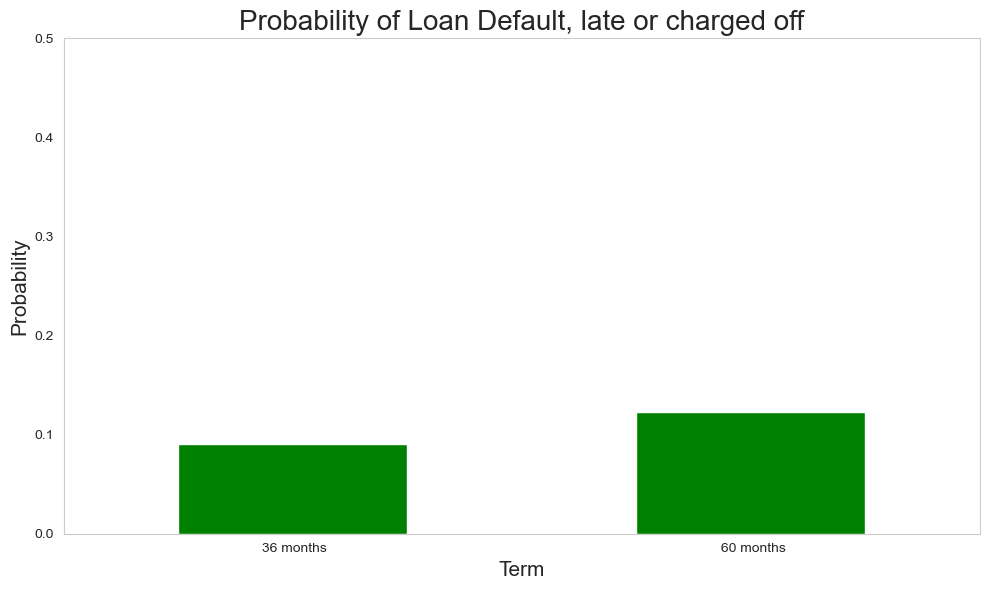

In [13]:
# Step 3: Calculate the count of 'Default' loan statuses for each term
default_counts = default_loan['term'].value_counts()
print(default_counts)

# Step 4: Calculate the probability of loan default for each term
total_loans_per_term = loan['term'].value_counts()
default_probabilities = default_counts / total_loans_per_term

print(default_probabilities)

# Step 5: Plot the probabilities in a bar plot
plt.figure(figsize=(10, 6))
default_probabilities.sort_index().plot(kind='bar', color='green')
plt.title('Probability of Loan Default, late or charged off',size=20)
plt.xlabel('Term',size=15)
plt.ylabel('Probability',size=15)
plt.ylim(0, 0.5)  # Limit y-axis to 0.5 for better visualization
plt.xticks(rotation=0)
plt.grid(False)
plt.tight_layout()
plt.show()

60 months loans default more than 36 months loans

verification_status
Source Verified    55392
Verified           41576
Not Verified       29815
Name: count, dtype: int64
verification_status
Not Verified       0.066936
Source Verified    0.104416
Verified           0.140821
Name: count, dtype: float64


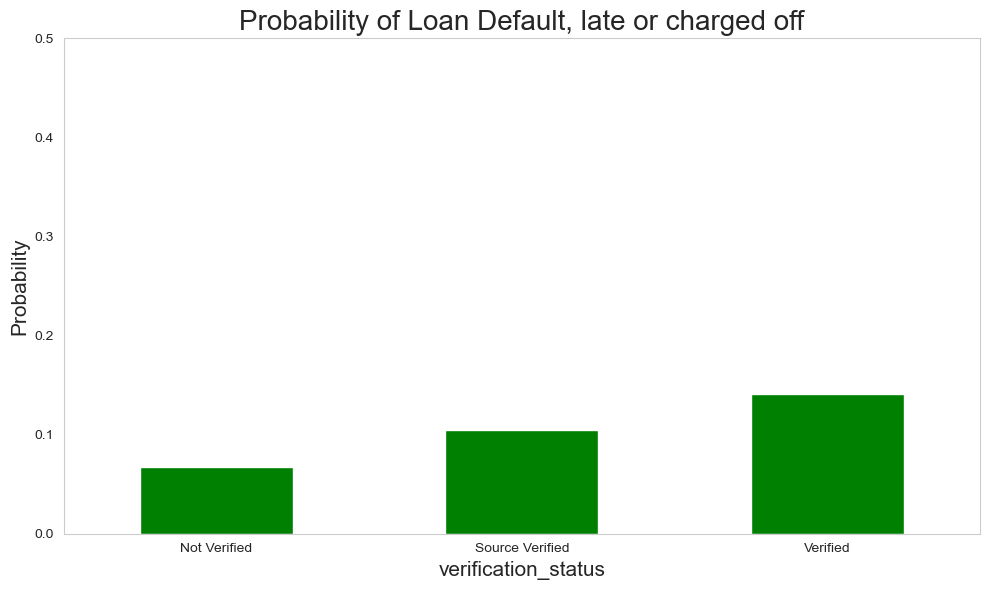

In [14]:
# Step 3: Calculate the count of 'Default' loan statuses for each term
default_counts = default_loan['verification_status'].value_counts()
print(default_counts)

# Step 4: Calculate the probability of loan default for each term
total_loans_per_vs = loan['verification_status'].value_counts()
default_probabilities = default_counts / total_loans_per_vs

print(default_probabilities)

# Step 5: Plot the probabilities in a bar plot
plt.figure(figsize=(10, 6))
default_probabilities.sort_index().plot(kind='bar', color='green')
plt.title('Probability of Loan Default, late or charged off',size=20)
plt.xlabel('verification_status',size=15)
plt.ylabel('Probability',size=15)
plt.ylim(0, 0.5)  # Limit y-axis to 0.5 for better visualization
plt.xticks(rotation=0)
plt.grid(False)
plt.tight_layout()
plt.show()

surprisingly, verified loans default more than not verified

purpose
debt_consolidation    75273
credit_card           22400
other                  9241
home_improvement       8232
major_purchase         3212
small_business         2236
medical                1832
moving                 1200
car                    1072
vacation               1013
house                   962
renewable_energy        109
wedding                   1
Name: count, dtype: int64
purpose
car                   0.076539
credit_card           0.077506
debt_consolidation    0.107738
educational                NaN
home_improvement      0.091491
house                 0.100533
major_purchase        0.103824
medical               0.108268
moving                0.129758
other                 0.104669
renewable_energy      0.135404
small_business        0.161200
vacation              0.102874
wedding               0.125000
Name: count, dtype: float64


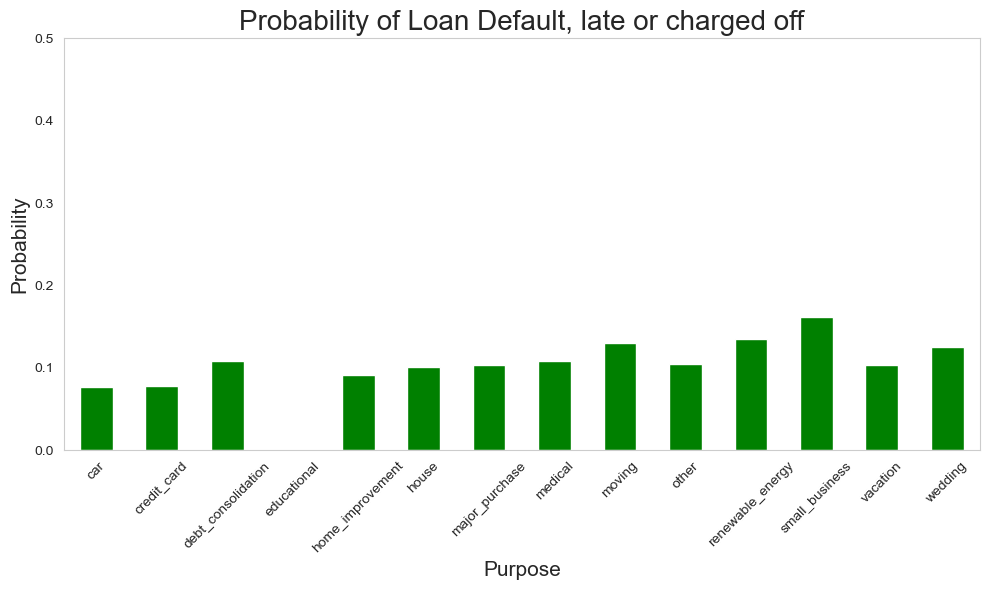

In [15]:
# Step 3: Calculate the count of 'Default' loan statuses for each term
default_counts = default_loan['purpose'].value_counts()
print(default_counts)

# Step 4: Calculate the probability of loan default for each term
total_loans_per_purpose = loan['purpose'].value_counts()
default_probabilities = default_counts / total_loans_per_purpose

print(default_probabilities)

# Step 5: Plot the probabilities in a bar plot
plt.figure(figsize=(10, 6))
default_probabilities.sort_index().plot(kind='bar', color='green')
plt.title('Probability of Loan Default, late or charged off',size=20)
plt.xlabel('Purpose',size=15)
plt.ylabel('Probability',size=15)
plt.ylim(0, 0.5)  # Limit y-axis to 0.5 for better visualization
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

 small business loans default the most, then renewable energy.

In [16]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
loan['loan_amnt'] = loan['loan_amnt'].apply(lambda x: loan_amount(x))
default_loan['loan_amnt'] = default_loan['loan_amnt'].apply(lambda x: loan_amount(x))

loan_amnt
medium       53095
high         38992
very high    25265
low           9431
Name: count, dtype: int64
loan_amnt
medium       0.095356
high         0.110615
very high    0.105748
low          0.076718
Name: count, dtype: float64


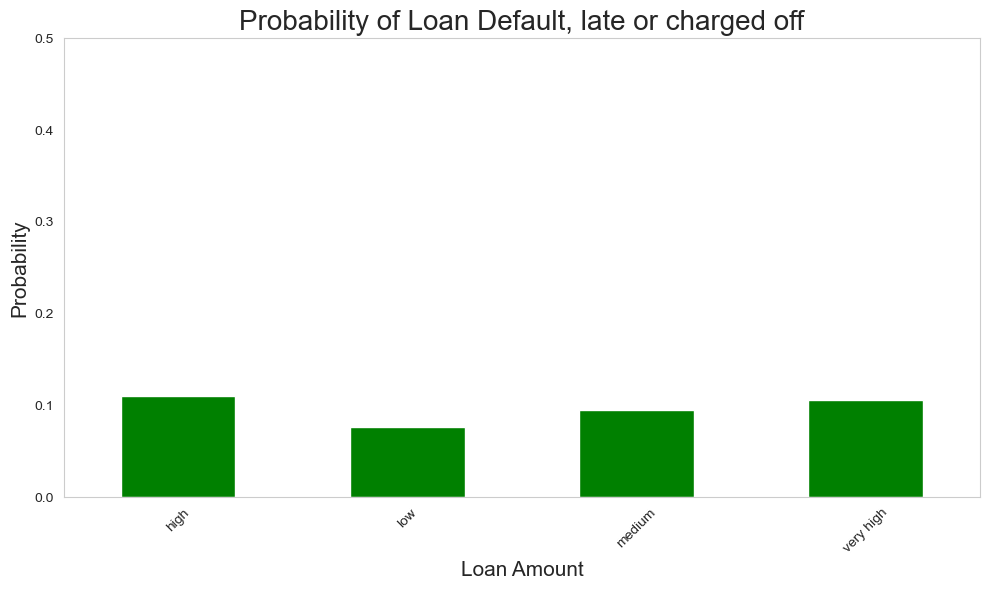

In [17]:
# Step 3: Calculate the count of 'Default' loan statuses for each term
default_counts = default_loan['loan_amnt'].value_counts()
print(default_counts)

# Step 4: Calculate the probability of loan default for each term
total_loans_per_amnt = loan['loan_amnt'].value_counts()
default_probabilities = default_counts / total_loans_per_amnt

print(default_probabilities)

# Step 5: Plot the probabilities in a bar plot
plt.figure(figsize=(10, 6))
default_probabilities.sort_index().plot(kind='bar', color='green')
plt.title('Probability of Loan Default, late or charged off',size=20)
plt.xlabel('Loan Amount',size=15)
plt.ylabel('Probability',size=15)
plt.ylim(0, 0.5)  # Limit y-axis to 0.5 for better visualization
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

In [18]:
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
loan['int_rate'] = loan['int_rate'].apply(lambda x: int_rate(x))
default_loan['int_rate'] = default_loan['int_rate'].apply(lambda x: int_rate(x))

int_rate
high      63056
medium    48727
low       15000
Name: count, dtype: int64
int_rate
high      0.168826
low       0.038911
medium    0.095140
Name: count, dtype: float64


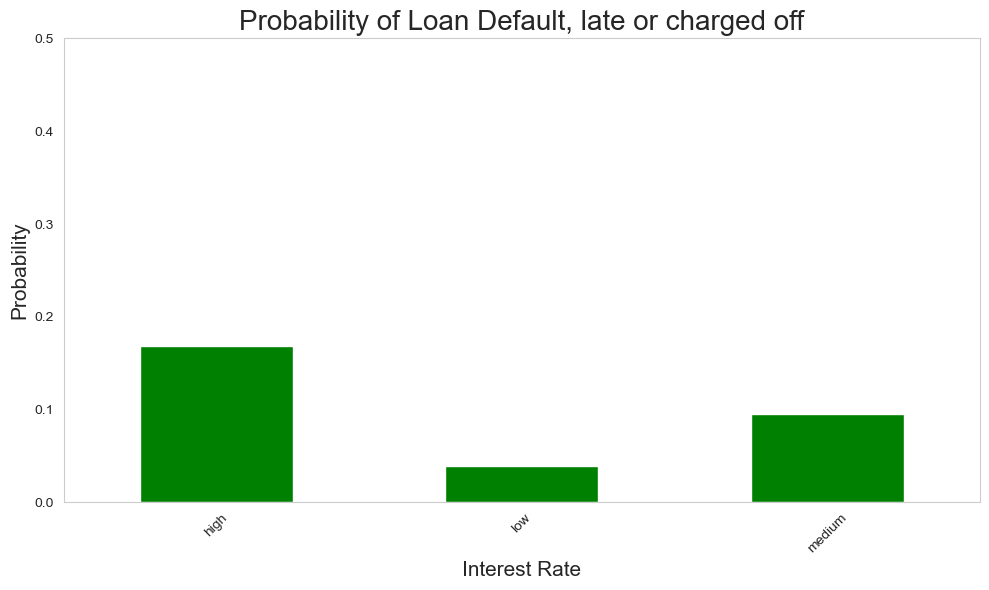

In [19]:
# Step 3: Calculate the count of 'Default' loan statuses for each term
default_counts = default_loan['int_rate'].value_counts()
print(default_counts)

# Step 4: Calculate the probability of loan default for each term
total_loans_per_rate = loan['int_rate'].value_counts()
default_probabilities = default_counts / total_loans_per_rate

print(default_probabilities)

# Step 5: Plot the probabilities in a bar plot
plt.figure(figsize=(10, 6))
default_probabilities.sort_index().plot(kind='bar', color='green')
plt.title('Probability of Loan Default, late or charged off',size=20)
plt.xlabel('Interest Rate',size=15)
plt.ylabel('Probability',size=15)
plt.ylim(0, 0.5)  # Limit y-axis to 0.5 for better visualization
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

In [20]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

loan['dti'] = loan['dti'].apply(lambda x: dti(x))
default_loan['dti'] = default_loan['dti'].apply(lambda x: dti(x))

dti
high      61288
medium    46638
low       18857
Name: count, dtype: int64
dti
high      0.116795
medium    0.090817
low       0.080977
Name: count, dtype: float64


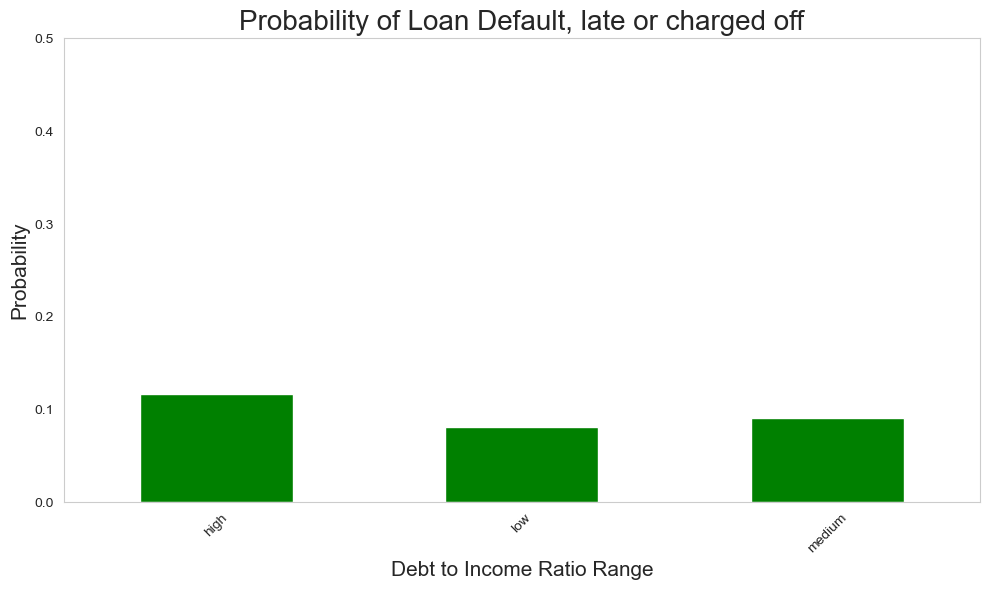

In [21]:
# Step 3: Calculate the count of 'Default' loan statuses for each term
default_counts = default_loan['dti'].value_counts()
print(default_counts)

# Step 4: Calculate the probability of loan default for each term
total_loans_per_dti = loan['dti'].value_counts()
default_probabilities = default_counts / total_loans_per_dti

print(default_probabilities)

# Step 5: Plot the probabilities in a bar plot
plt.figure(figsize=(10, 6))
default_probabilities.sort_index().plot(kind='bar', color='green')
plt.title('Probability of Loan Default, late or charged off',size=20)
plt.xlabel('Debt to Income Ratio Range',size=15)
plt.ylabel('Probability',size=15)
plt.ylim(0, 0.5)  # Limit y-axis to 0.5 for better visualization
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

In [22]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

loan['annual_inc'] = loan['annual_inc'].apply(lambda x: annual_income(x))
default_loan['annual_inc'] = default_loan['annual_inc'].apply(lambda x: annual_income(x))

annual_inc
medium       63587
low          40150
high         16604
very high     6442
Name: count, dtype: int64
annual_inc
medium       0.101484
low          0.111286
high         0.085491
very high    0.071909
Name: count, dtype: float64


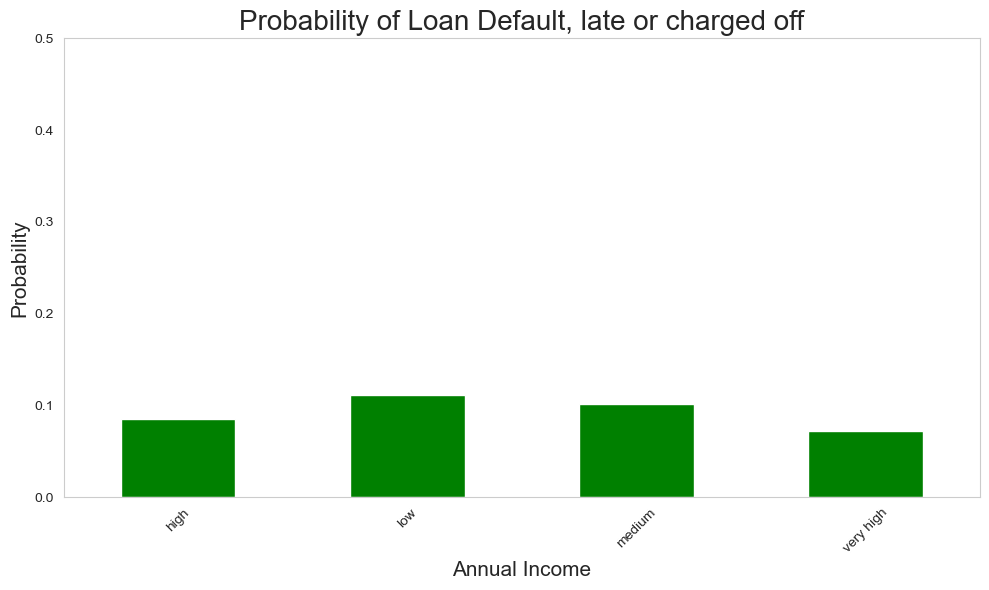

In [24]:
# Step 3: Calculate the count of 'Default' loan statuses for each term
default_counts = default_loan['annual_inc'].value_counts()
print(default_counts)

# Step 4: Calculate the probability of loan default for each term
total_loans_per_income = loan['annual_inc'].value_counts()
default_probabilities = default_counts / total_loans_per_income

print(default_probabilities)

# Step 5: Plot the probabilities in a bar plot
plt.figure(figsize=(10, 6))
default_probabilities.sort_index().plot(kind='bar', color='green')
plt.title('Probability of Loan Default, late or charged off',size=20)
plt.xlabel('Annual Income',size=15)
plt.ylabel('Probability',size=15)
plt.ylim(0, 0.5)  # Limit y-axis to 0.5 for better visualization
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

lower the annual income, higher the default rate

In [ ]:
# employment length
# first, let's drop the missing value observations in emp length
loan = loan[~loan['emp_length'].isnull()]
default_loan = default_loan[~default_loan['emp_length'].isnull()]

# binning the variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

loan['emp_length'] = loan['emp_length'].apply(lambda x: emp_length(x))
default_loan['emp_length'] = default_loan['emp_length'].apply(lambda x: emp_length(x))

emp_length
expert     52514
senior     27560
junior     24697
fresher    22012
Name: count, dtype: int64
emp_length
expert     0.095636
senior     0.099914
junior     0.104858
fresher    0.104477
Name: count, dtype: float64


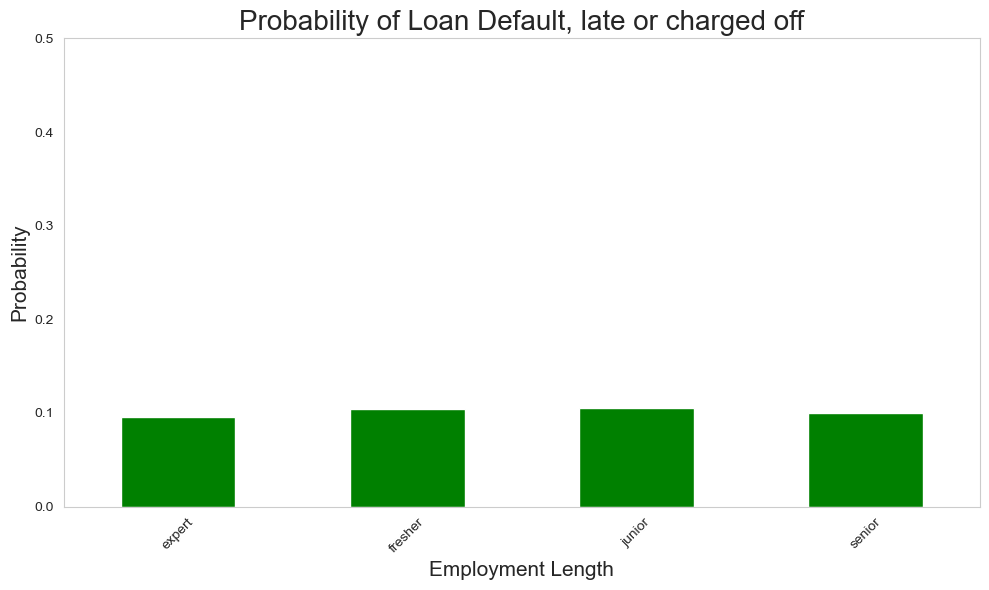

In [28]:
# Step 3: Calculate the count of 'Default' loan statuses for each term
default_counts = default_loan['emp_length'].value_counts()
print(default_counts)

# Step 4: Calculate the probability of loan default for each term
total_loans_per_length = loan['emp_length'].value_counts()
default_probabilities = default_counts / total_loans_per_length

print(default_probabilities)

# Step 5: Plot the probabilities in a bar plot
plt.figure(figsize=(10, 6))
default_probabilities.sort_index().plot(kind='bar', color='green')
plt.title('Probability of Loan Default, late or charged off',size=20)
plt.xlabel('Employment Length',size=15)
plt.ylabel('Probability',size=15)
plt.ylim(0, 0.5)  # Limit y-axis to 0.5 for better visualization
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
# debt to income ratio
def ficco(n):
    if n <= 700:
        return 'low'
    elif n > 700 and n <=800:
        return 'medium'
    else:
        return 'high'
    

loan['fico_range_low'] = loan['fico_range_low'].apply(lambda x: ficco(x))
default_loan['fico_range_low'] = default_loan['fico_range_low'].apply(lambda x: ficco(x))

fico_range_low
low       95224
medium    31123
high        436
Name: count, dtype: int64
fico_range_low
low       0.123939
medium    0.063788
high      0.029207
Name: count, dtype: float64


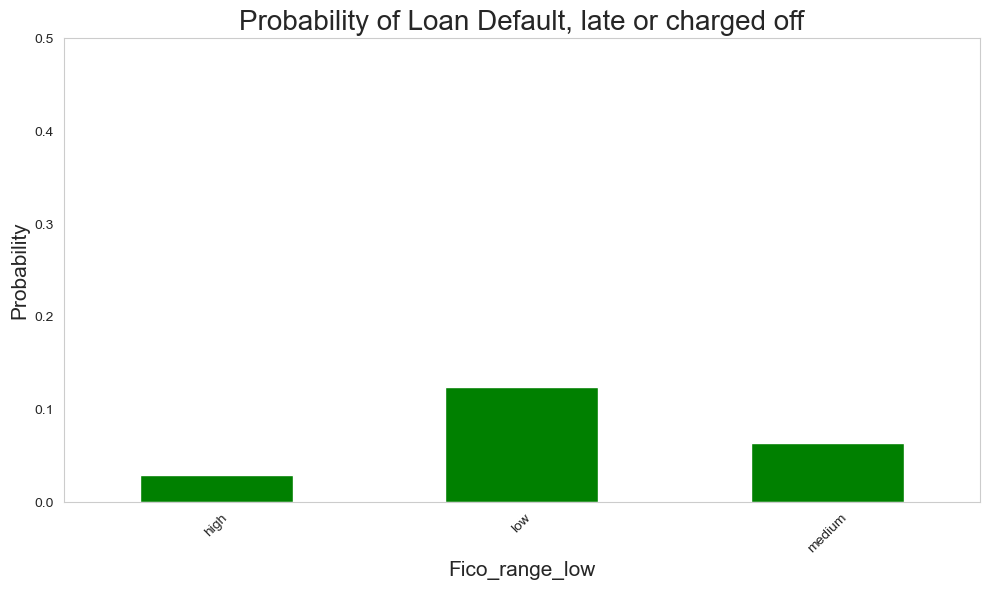

In [44]:
# Step 3: Calculate the count of 'Default' loan statuses for each term
default_counts = default_loan['fico_range_low'].value_counts()
print(default_counts)

# Step 4: Calculate the probability of loan default for each term
total_loans_per_fico = loan['fico_range_low'].value_counts()
default_probabilities = default_counts / total_loans_per_fico

print(default_probabilities)

# Step 5: Plot the probabilities in a bar plot
plt.figure(figsize=(10, 6))
default_probabilities.sort_index().plot(kind='bar', color='green')
plt.title('Probability of Loan Default, late or charged off',size=20)
plt.xlabel('Fico_range_low',size=15)
plt.ylabel('Probability',size=15)
plt.ylim(0, 0.5)  # Limit y-axis to 0.5 for better visualization
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

[Text(0, 0.5, '(%)')]

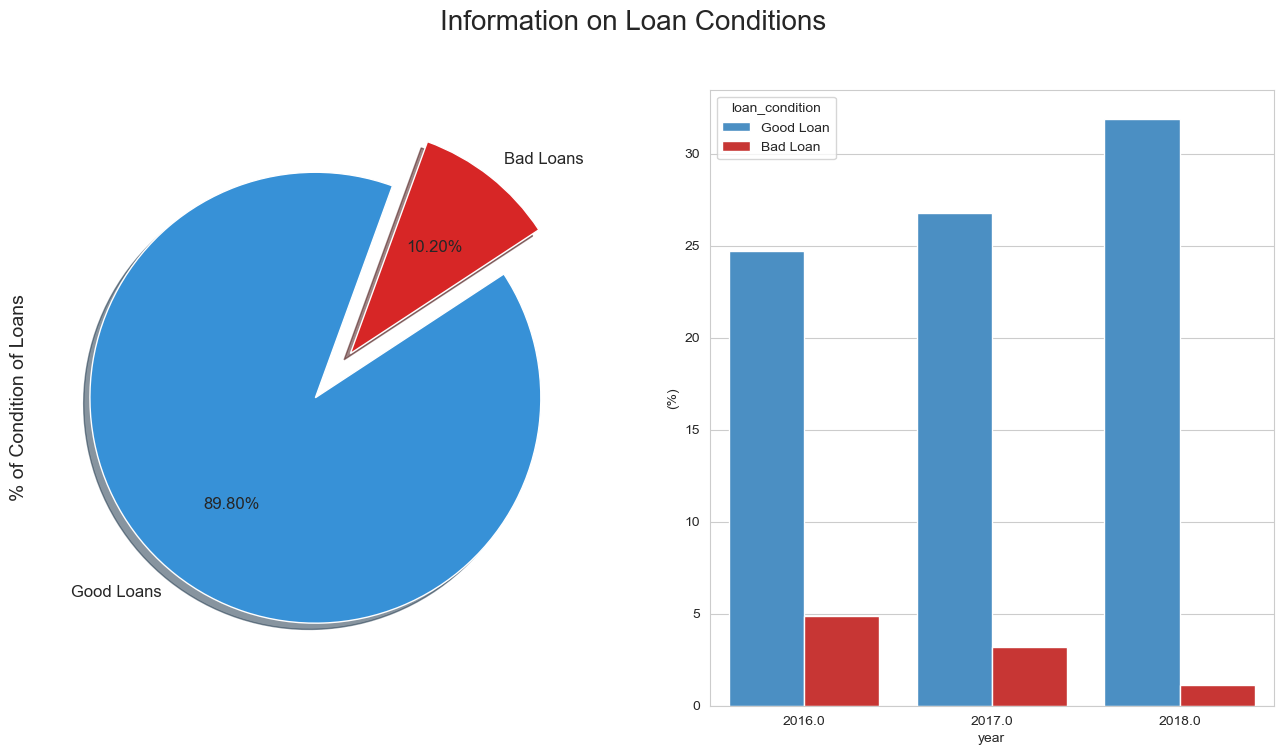

In [45]:
# Determining the loans that are bad from loan_status column
dt_series = pd.to_datetime(loan['issue_d'])
df['year'] = dt_series.dt.year

bad_loan = ['Default', 'Late (31-120 days)', 'Late (16-30 days)','Charged Off']
            
#, 'Late (16-30 days)', 'Late (31-120 days)', 'In Grace Period'
 
df['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
    
df['loan_condition'] = df['loan_status'].apply(loan_condition)
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"

plt.suptitle('Information on Loan Conditions', fontsize=20)

df["loan_condition"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)
# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#3791D7", "#E01E1B"]

sns.barplot(x="year", y="loan_amnt", hue="loan_condition", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")


### Conclusion


Loan amounts increased over the years from 2016 to 2018.

No apparent seasonality was found in the data.

The probability of being a defaulter increases from grade A to G.

Borrowers with lower Debt-to-Income (DTI) ratios and higher FICO scores tend to have lower risk on loans.

Higher Annual Income borrowers are less likely to default.

Longer Employment length borrowers have less Risk On Loan.

Defaulters typically do not have any payment plan.

Interest rates increase with grades from A to G. Lower interest rate -> Less chance of default.

Short term loans are less like to default.

small business loans default the most, then renewable energy.

The majority of defaulters are from New York City, while non-defaulters are predominantly from California.

From this loan data set, 90% can be considered good loans, while 10% are considered bad loans.

surprisingly, verified loans default more than not verified.
